In [37]:
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

In [38]:
datafile = pd.read_json('https://data.cityofnewyork.us/resource/kpav-sd4t.json')

In [20]:
datafile.head()

,job_id,agency,posting_type,number_of_positions,business_title,civil_service_title,title_classification,title_code_no,level,job_category,...,preferred_skills,additional_information,to_apply,hours_shift,work_location_1,residency_requirement,posting_date,post_until,posting_updated,process_date
0,388466,POLICE DEPARTMENT,External,2,Plumber,PLUMBER,Competitive-1,91915,00,Building Operations & Maintenance Public Safet...,...,- Ability to multi-task while maintaining orga...,"In compliance with Federal Law, all persons hi...",Please click Apply Now,0700 x 1430,"59-06 Laurel Hill Blvd, Queens",New York City residency is generally required ...,2020-03-03T00:00:00.000,17-APR-2020,2020-03-03T00:00:00.000,2020-03-10T00:00:00.000
1,428741,DEPT OF INFO TECH & TELECOMM,Internal,2,Associate Email Security Engineer,CYBER SECURITY ANALYST,Competitive-1,13633,02,"Technology, Data & Innovation",...,The preferred candidate should possess the fol...,NaN,Special Note: Taking and passing civil service...,Day - Due to the necessary technical support d...,"New York, NY",New York City residency is generally required ...,2020-01-29T00:00:00.000,NaN,2020-01-29T00:00:00.000,2020-03-10T00:00:00.000
2,396801,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Stationary Engineer (Electric),STATIONARY ENGINEER (ELECTRIC),Competitive-1,91645,00,Building Operations & Maintenance,...,NaN,Appointments are subject to OMB approval. For...,Click the âApply Nowâ button,NaN,NaN,New York City residency is generally required ...,2019-06-03T00:00:00.000,NaN,2019-06-03T00:00:00.000,2020-03-10T00:00:00.000
3,436173,DEPARTMENT OF BUILDINGS,Internal,1,"Assistant Plan Examiner, Electrical",ASSISTANT ELECTRICAL ENGINEER,Competitive-1,20310,00,"Engineering, Architecture, & Planning",...,"â¢ Knowledge of the NYC Construction Codes, N...",This position is open to qualified persons wit...,For Non-City/External Candidates: Visit the Ex...,NaN,NaN,New York City Residency is not required for th...,2020-03-02T00:00:00.000,15-MAR-2020,2020-03-02T00:00:00.000,2020-03-10T00:00:00.000
4,307021,DEPT OF ENVIRONMENT PROTECTION,External,2,ELECTRICAL ENGINEERING INTERN,ELECTRICAL ENGINEERING INTERN,Competitive-1,20302,00,"Engineering, Architecture, & Planning",...,NaN,DEP is an equal opportunity employer with a st...,Click the Apply Now button,NaN,NaN,New York City Residency is not required for th...,2017-11-03T00:00:00.000,NaN,2017-11-03T00:00:00.000,2020-03-10T00:00:00.000


In [5]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 29 columns):
job_id                           1000 non-null int64
agency                           1000 non-null object
posting_type                     1000 non-null object
number_of_positions              1000 non-null int64
business_title                   1000 non-null object
civil_service_title              1000 non-null object
title_classification             1000 non-null object
title_code_no                    1000 non-null object
level                            1000 non-null object
job_category                     1000 non-null object
full_time_part_time_indicator    937 non-null object
career_level                     1000 non-null object
salary_range_from                1000 non-null float64
salary_range_to                  1000 non-null float64
salary_frequency                 1000 non-null object
work_location                    1000 non-null object
division_work_unit             

In [21]:
datafile.describe()

,job_id,number_of_positions,salary_range_from,salary_range_to
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,403118.045000,2.923000,52810.242055,74396.529593
std,50856.604765,10.354336,29570.912693,44868.524824
min,132292.000000,1.000000,0.000000,15.000000
25%,396801.000000,1.000000,39082.250000,55870.000000
50%,425382.000000,1.000000,55205.500000,75000.000000
75%,433001.000000,1.000000,71423.000000,98128.000000
max,437313.000000,200.000000,209585.000000,241434.000000


In [22]:
#Divide into a training set and a testing set.

dummydata = datafile[['job_id','agency','posting_type','number_of_positions','business_title','job_category','full_time_part_time_indicator','salary_range_from','salary_range_to','minimum_qual_requirements','preferred_skills']]

In [23]:
dummydata.head()

,job_id,agency,posting_type,number_of_positions,business_title,job_category,full_time_part_time_indicator,salary_range_from,salary_range_to,minimum_qual_requirements,preferred_skills
0,388466,POLICE DEPARTMENT,External,2,Plumber,Building Operations & Maintenance Public Safet...,F,369.53,369.53,(1) Five years of full-time satisfactory exper...,- Ability to multi-task while maintaining orga...
1,428741,DEPT OF INFO TECH & TELECOMM,Internal,2,Associate Email Security Engineer,"Technology, Data & Innovation",NaN,78795.00,110000.00,"1. A baccalaureate degree, from an accredited ...",The preferred candidate should possess the fol...
2,396801,DEPT OF ENVIRONMENT PROTECTION,Internal,1,Stationary Engineer (Electric),Building Operations & Maintenance,F,58.40,58.40,1. Five years of full-time satisfactory experi...,NaN
3,436173,DEPARTMENT OF BUILDINGS,Internal,1,"Assistant Plan Examiner, Electrical","Engineering, Architecture, & Planning",F,57078.00,65640.00,1. A baccalaureate degree in electrical engine...,"â¢ Knowledge of the NYC Construction Codes, N..."
4,307021,DEPT OF ENVIRONMENT PROTECTION,External,2,ELECTRICAL ENGINEERING INTERN,"Engineering, Architecture, & Planning",F,47860.00,57958.00,1. A baccalaureate degree in electrical engine...,NaN


In [24]:
dummydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
job_id                           1000 non-null int64
agency                           1000 non-null object
posting_type                     1000 non-null object
number_of_positions              1000 non-null int64
business_title                   1000 non-null object
job_category                     1000 non-null object
full_time_part_time_indicator    942 non-null object
salary_range_from                1000 non-null float64
salary_range_to                  1000 non-null float64
minimum_qual_requirements        995 non-null object
preferred_skills                 860 non-null object
dtypes: float64(2), int64(2), object(7)
memory usage: 86.1+ KB


In [17]:
dummydata.describe()

,job_id,number_of_positions,salary_range_from,salary_range_to
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,403118.045000,2.923000,52810.242055,74396.529593
std,50856.604765,10.354336,29570.912693,44868.524824
min,132292.000000,1.000000,0.000000,15.000000
25%,396801.000000,1.000000,39082.250000,55870.000000
50%,425382.000000,1.000000,55205.500000,75000.000000
75%,433001.000000,1.000000,71423.000000,98128.000000
max,437313.000000,200.000000,209585.000000,241434.000000


In [35]:
import matplotlib.pyplot as plt


In [27]:
from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
from sklearn.preprocessing import OneHotEncoder
job_cat = dummydata['business_title'].values.reshape(-1,1)

cat_encoder = OneHotEncoder()
job_cat_1hot = cat_encoder.fit_transform(job_cat)
job_cat_1hot

<1000x682 sparse matrix of type '<class 'numpy.float64'>'
	with 1000 stored elements in Compressed Sparse Row format>

In [28]:
job_cat_1hot.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

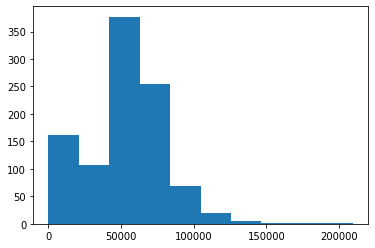

In [30]:
plt.hist(dummydata['salary_range_from'].values.reshape(-1, 1), bins=10)
plt.show()

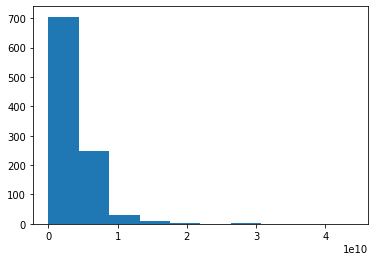

In [31]:
plt.hist(dummydata['salary_range_from'].values.reshape(-1, 1)**2, bins=10)
plt.show()

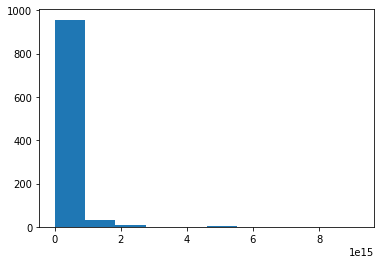

In [32]:
plt.hist(dummydata['salary_range_from'].values.reshape(-1, 1)**3, bins=10)
plt.show()

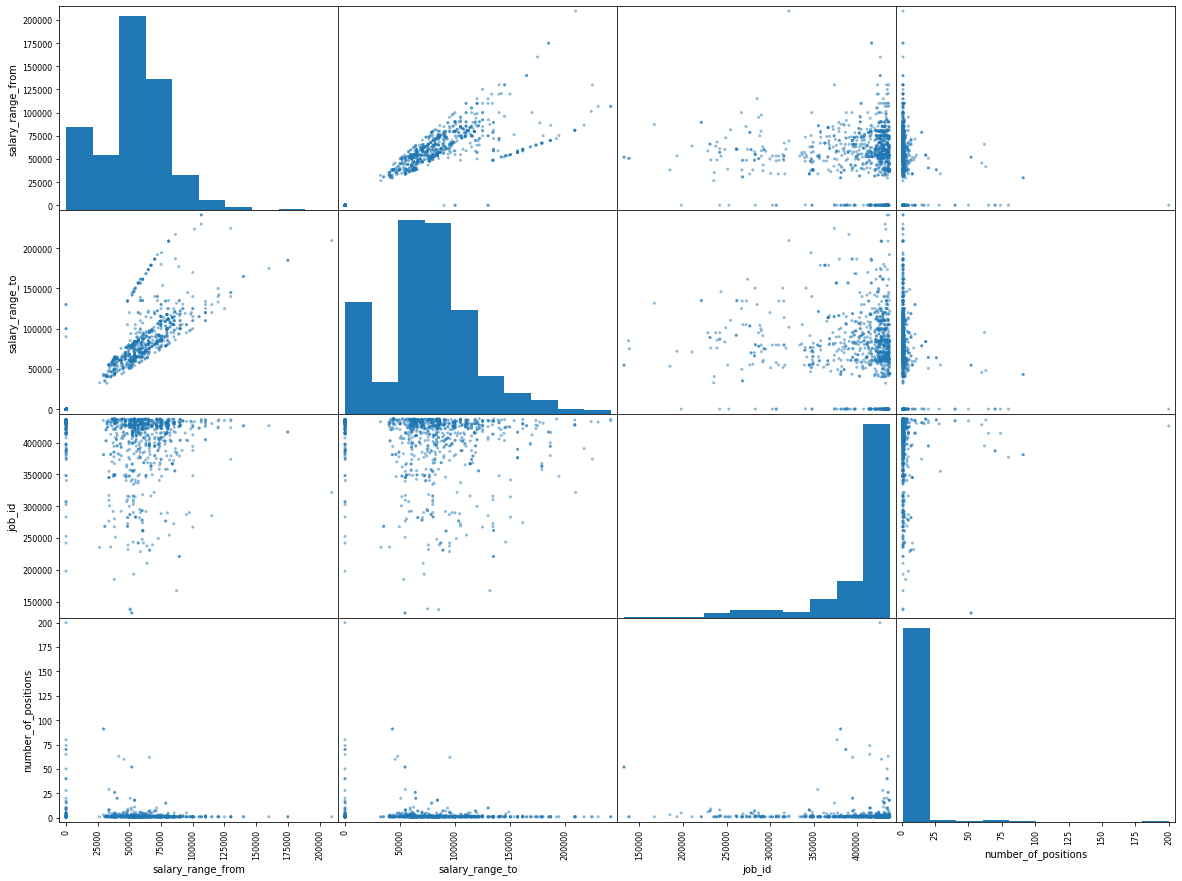

In [59]:
from matplotlib import pyplot
attributes = ['salary_range_from','salary_range_to','job_id','number_of_positions']
scatter_matrix((dummydata[attributes]),figsize=(20, 15))
pyplot.show()

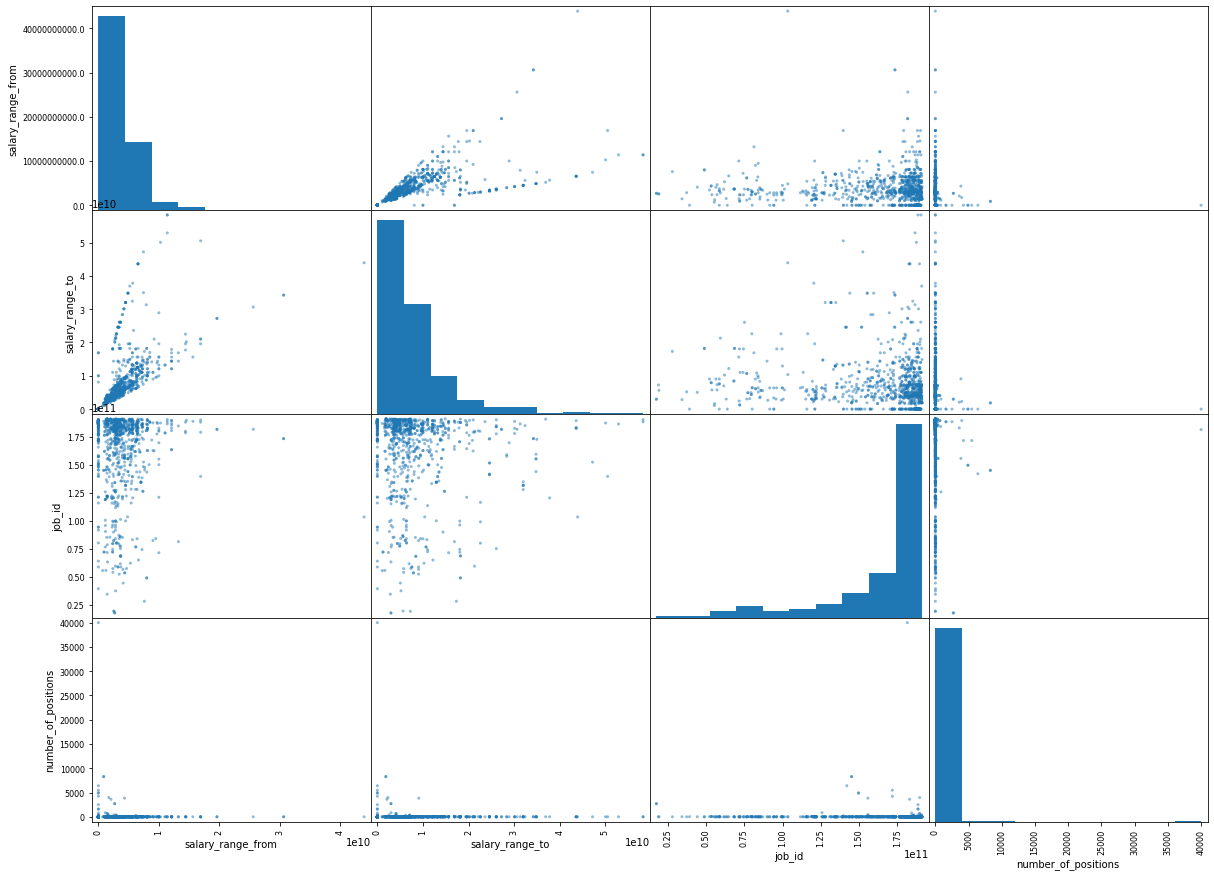

In [60]:
attributes = ['salary_range_from','salary_range_to','job_id','number_of_positions']
scatter_matrix((dummydata[attributes]**2),figsize=(20, 15))
pyplot.show()

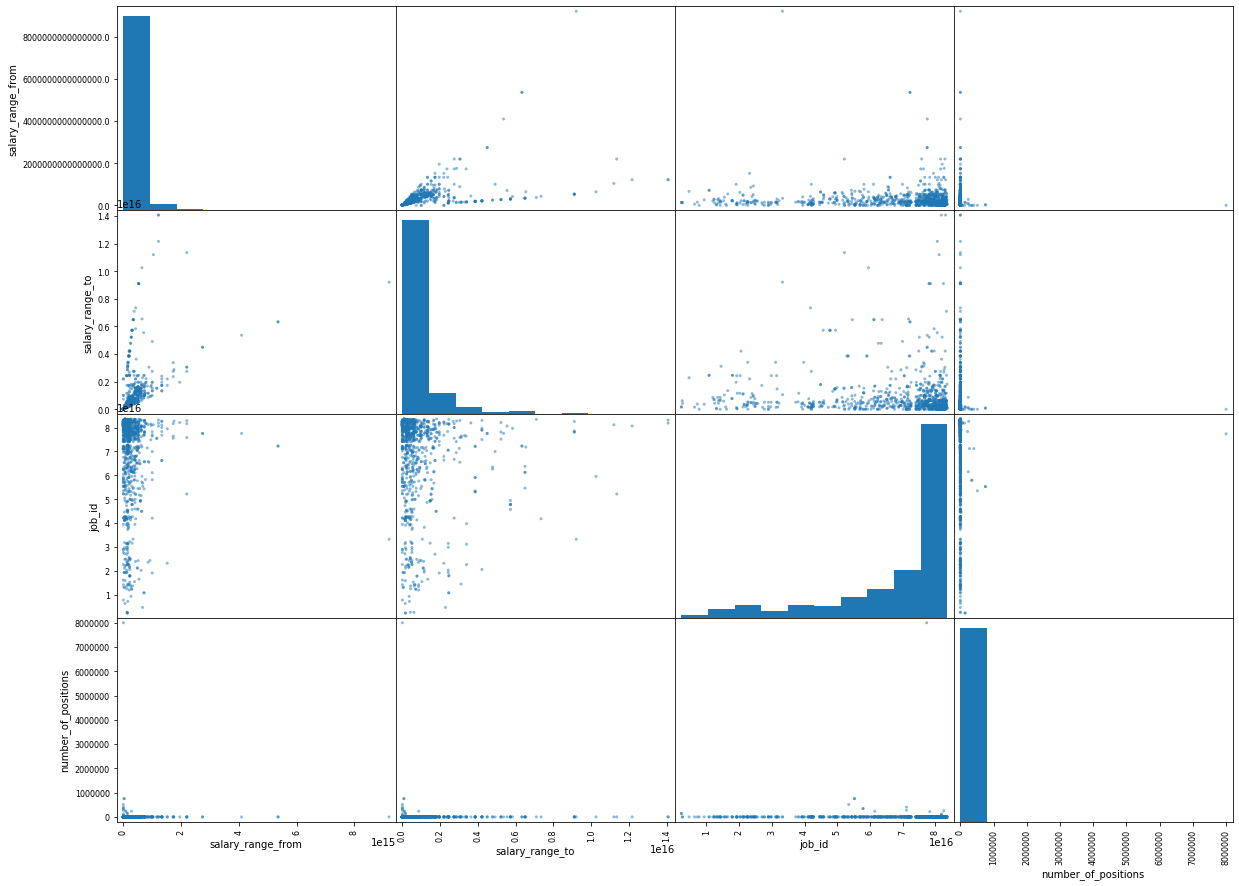

In [62]:
scatter_matrix((dummydata[attributes]**3),figsize=(20, 15))
pyplot.show()

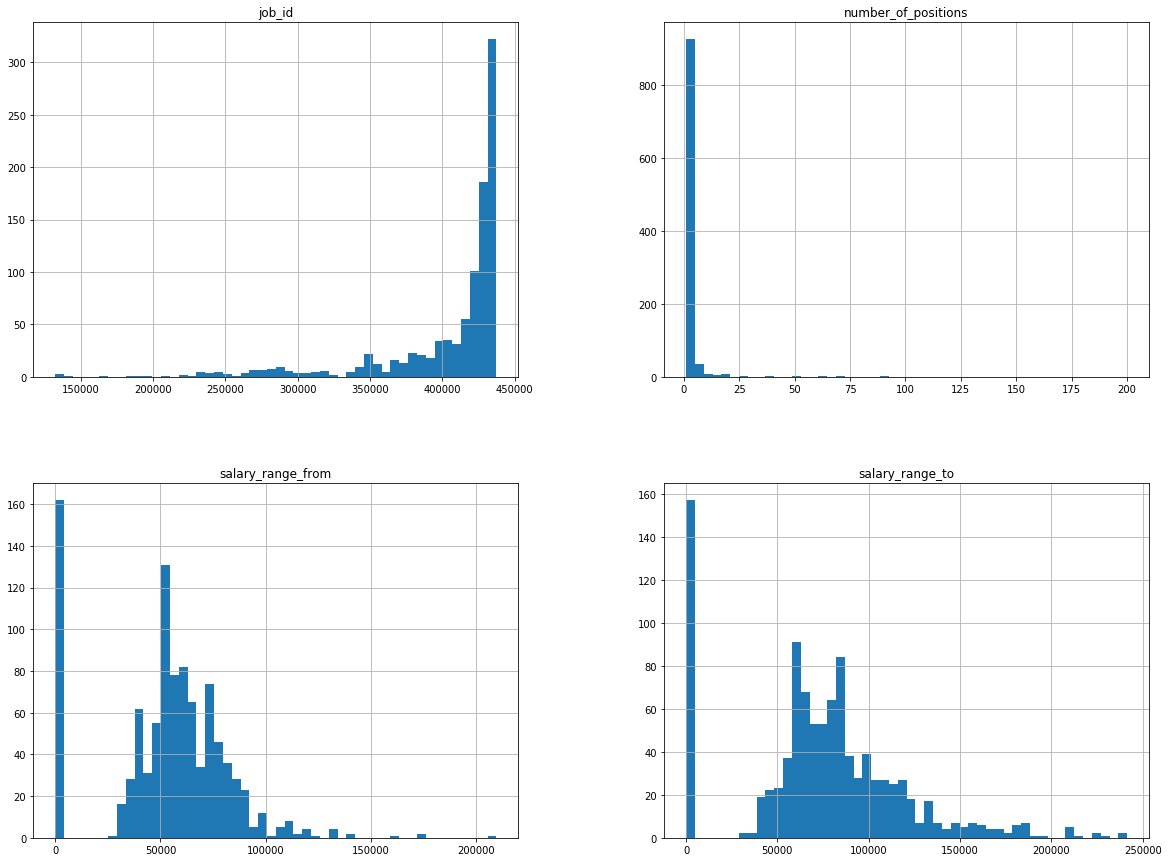

In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
dummydata.hist(bins=50, figsize=(20,15))
plt.show()

There are more jobs available with ID 0 to 25